In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [0]:
data=tf.keras.datasets.fashion_mnist

In [42]:
(tr_x,tr_y),(ts_x,ts_y)=data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
import matplotlib.pyplot as plt

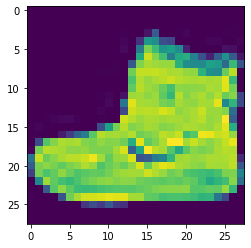

In [52]:
np.set_printoptions(linewidth=200)
plt.imshow(tr_x[0])

In [54]:
tr_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

Normalizing the Data

In [0]:
tr_x=tr_x/255.0
ts_x=ts_x/255.0

In [0]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
model.fit(tr_x,tr_y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4751 - accuracy: 0.8301
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3552 - accuracy: 0.8712
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3220 - accuracy: 0.8805
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2967 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2773 - accuracy: 0.8961
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2651 - accuracy: 0.9010
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2532 - accuracy: 0.9061
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2386 - accuracy: 0.9114
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2314 - accuracy: 0.9124
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [68]:
model.evaluate(ts_x,ts_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.3473 - accuracy: 0.8850


[0.34728753566741943, 0.8849999904632568]

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_7 (Dense)              multiple                  803840    
_________________________________________________________________
dense_8 (Dense)              multiple                  10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


### Using Convolutions

In [0]:
tr_x=tr_x.reshape(60000,28,28,1)
ts_x=ts_x.reshape(10000,28,28,1)

In [0]:
model1=tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                            tf.keras.layers.MaxPooling2D(),
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.keras.layers.MaxPooling2D(),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])

In [0]:
model1.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [86]:
model1.fit(tr_x,tr_y,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4556 - accuracy: 0.8364
Epoch 2/7
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3026 - accuracy: 0.8895
Epoch 3/7
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2571 - accuracy: 0.9043
Epoch 4/7
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2238 - accuracy: 0.9178
Epoch 5/7
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1970 - accuracy: 0.9279
Epoch 6/7
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1758 - accuracy: 0.9349
Epoch 7/7
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1539 - accuracy: 0.9426


In [88]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [90]:
test_loss,test_acc=model1.evaluate(ts_x,ts_y)

313/313 [==============================] - 3s 9ms/step - loss: 0.2613 - accuracy: 0.9112


In [91]:
print('Accuracy of the model after using Convolutions :',test_acc)

Accuracy of the model after using Convolutions : 0.9111999869346619


**Report**: The performance of the model was pretty good using Convolutions as compared to normal neural network (without convolutions). The accuracy on the test data is 91% but it can increased to 99% or above using different convolutions and increasing number of epochs.